# Simulación de diferentes tipos de errores y ver cómo afectan a una variedad de circuitos cuánticos más complejos, en este caso el resultado de un circuito que implementa el algoritmo de Deutch Jozsa

El ruido no solo es aplicado a la medida, sino también a las puertas del circuito.

In [1]:
#!pip install qiskit

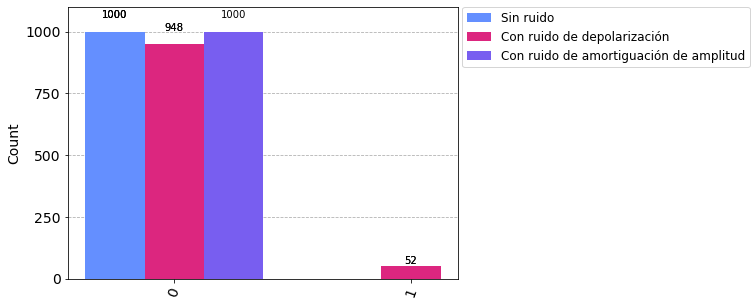

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error

# Este es el oráculo para una función constante
def oraculo_constante(circuito):
    # Definimos una función llamada 'oraculo_constante' que toma un circuito como argumento
    circuito.h(1) #le aplicamos hadamard al qubit 1 del circuito
    return circuito

# Esta es la parte del algoritmo de Deutsch-Jozsa
def deutsch_jozsa(circuito):
    circuito.x(1)  # Aplicamos una puerta X al qubit 1 del circuito
    circuito.h([0, 1])   # Aplicamos una puerta Hadamard a los qubits 0 y 1 del circuito


    circuito = oraculo_constante(circuito)

    # Hadamard y medimos el primer qubit
    circuito.h(0)   # Aplicamos una puerta Hadamard al qubit 0 del circuito
    circuito.measure([0], [0])  # Medimos el qubit 0 y almacenamos el resultado en el bit clásico 0


    return circuito

# Se crea el circuito y se aplica el algoritmo
circuito = QuantumCircuit(2, 1) # Creamos un circuito cuántico con 2 qubits y 1 bit clásico
circuito = deutsch_jozsa(circuito) # Llamamos a la función 'deutsch_jozsa' pasando el circuito como argumento


# modelos de ruido
prob_error = 0.1 #Esta variable determina la probabilidad de que ocurra un error en las compuertas cuánticas durante la simulación con ruido.
noise_model_dep = NoiseModel() #Este objeto servirá como modelo de ruido para simular errores de depolarización en las compuertas cuánticas.
error_gate_dep = depolarizing_error(prob_error, 1) # Esta función recibe dos argumentos: la probabilidad de error (prob_error) y la dimensión del espacio de Hilbert afectado por el error (en este caso, 1 qubit).
noise_model_dep.add_all_qubit_quantum_error(error_gate_dep, ['u1', 'u2', 'u3', 'h', 'x', 'measure'])
#se añade la posibilidad de que ocurran errores de depolarización en las compuertas de rotación (u1, u2, u3), la puerta Hadamard (h), la puerta X (x), y la operación de medición (measure).

noise_model_amp = NoiseModel()
error_gate_amp = amplitude_damping_error(prob_error) 
noise_model_amp.add_all_qubit_quantum_error(error_gate_amp, ['u1', 'u2', 'u3', 'h', 'x', 'measure'])
#se añade la posibilidad de que ocurran errores de amortiguación de amplitud en las compuertas de rotación (u1, u2, u3), la puerta Hadamard (h), la puerta X (x) y la operación de medición (measure).
#El error de amortiguación de amplitud es un tipo de ruido que representa la pérdida de energía del sistema cuántico, lo que puede llevar a errores en la amplitud de los estados cuánticos.


# Ejecutamos el circuito con y sin ruido
simulator = Aer.get_backend('qasm_simulator') ## Creamos un simulador cuántico utilizando el backend 'qasm_simulator' de Qiskit
job = execute(circuito, simulator, shots=1000) # Ejecutamos el circuito en el simulador sin ruido y realizamos 1000 pruebas
result = job.result() #resultado de la ejecución del circuito
counts = result.get_counts(circuito) # Obtenemos los resultados de la medición y los almacenamos en 'counts'

job_noise_dep = execute(circuito, simulator, shots=1000, noise_model=noise_model_dep) #Ejecutamos el circuito en el simulador con el modelo de ruido de depolarización y realizamos 1000 pruebas
result_noise_dep = job_noise_dep.result()
counts_noise_dep = result_noise_dep.get_counts(circuito)

job_noise_amp = execute(circuito, simulator, shots=1000, noise_model=noise_model_amp) # Ejecutamos el circuito en el simulador con el modelo de ruido de amortiguación de amplitud y realizamos 1000 pruebas
result_noise_amp = job_noise_amp.result()
counts_noise_amp = result_noise_amp.get_counts(circuito)

# Histograma de resultados
plot_histogram([counts, counts_noise_dep, counts_noise_amp], legend=['Sin ruido', 'Con ruido de depolarización', 'Con ruido de amortiguación de amplitud'])



- Este código implementa el algoritmo de Deutsch-Jozsa, que es un problema de búsqueda cuántica diseñado para mostrar la ventaja de la computación cuántica en comparación con la computación clásica.
- Este código implementa el algoritmo de Deutsch-Jozsa, un algoritmo cuántico que permite determinar si una función es constante o balanceada. 
- Un oráculo en un algoritmo cuántico se puede ver como una "caja negra" que realiza una operación específica en los qubits del circuito, representando una función o relación matemática en el problema que se está abordando. Puede ser diseñado para realizar cálculos específicos, como una función constante, una función balanceada o cualquier otro tipo de función que se desee investigar.

- Resumen:
El código define las funciones necesarias para implementar el algoritmo de Deutsch-Jozsa y luego crea un circuito cuántico en el que se aplica el algoritmo. Luego, se configuran modelos de ruido para simular errores en las compuertas cuánticas y se ejecuta el circuito tanto con ruido como sin ruido. Finalmente, se muestra un histograma de los resultados obtenidos.